## Laptop Price Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
#checking duplicate rows
df.duplicated().sum()

0

In [7]:
#checking if there are any missing values in the data
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [9]:
# dropping unnecessary columns from the data
df=df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:

df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')


In [12]:
# chaning data type of columns
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [13]:
df['Price']=df['Price'].astype('int32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int32  
dtypes: float32(1), float64(1), int32(2), object(7)
memory usage: 96.8+ KB


In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [16]:
# EDA
# univariate analysis

In [19]:
import seaborn as sns

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\993137087.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

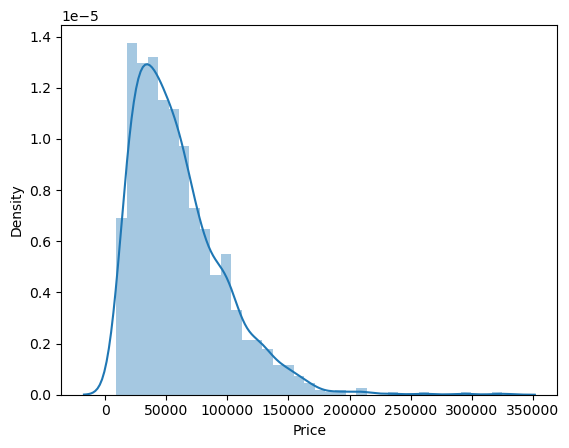

In [20]:
# distribution of rice
sns.distplot(df['Price'])

<Axes: >

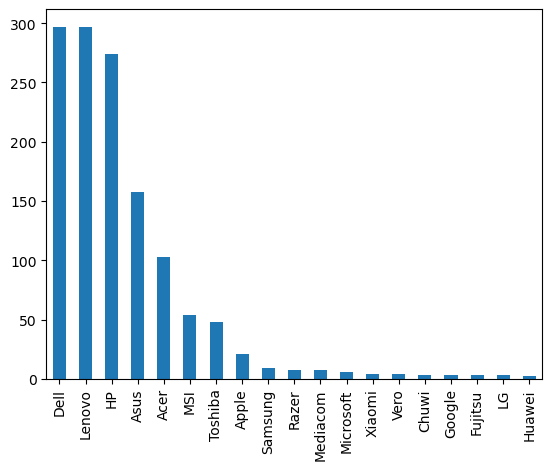

In [21]:
df['Company'].value_counts().plot(kind='bar')

In [22]:
import matplotlib.pyplot as plt

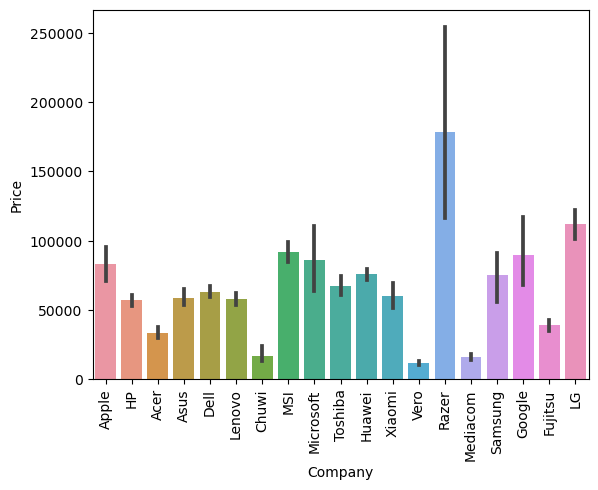

In [23]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

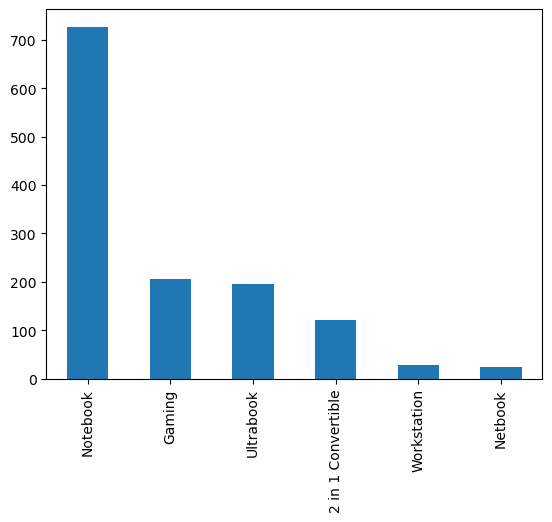

In [24]:
df['TypeName'].value_counts().plot(kind='bar')

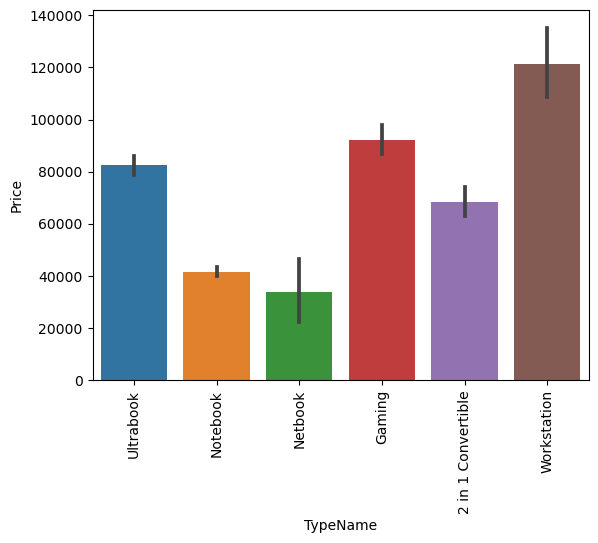

In [25]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

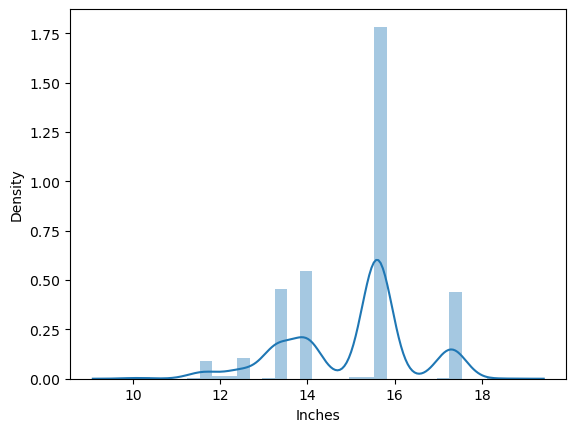

In [26]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

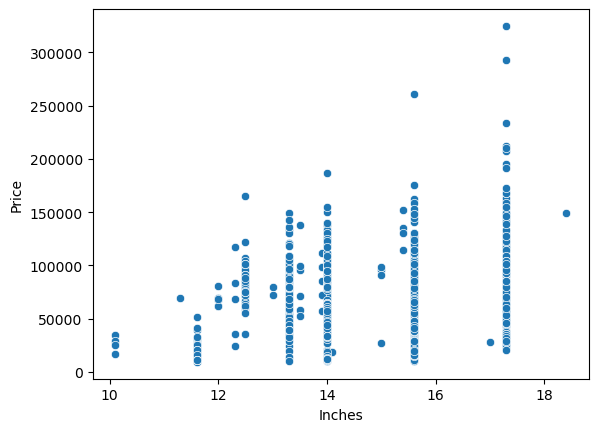

In [27]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [28]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895


In [29]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [30]:
# feature engineering, creating new columns

In [31]:
# adding a new column by the name 'Touchscreen'
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [32]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866,1
651,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,37775,0
117,Dell,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.16,60223,0


<Axes: >

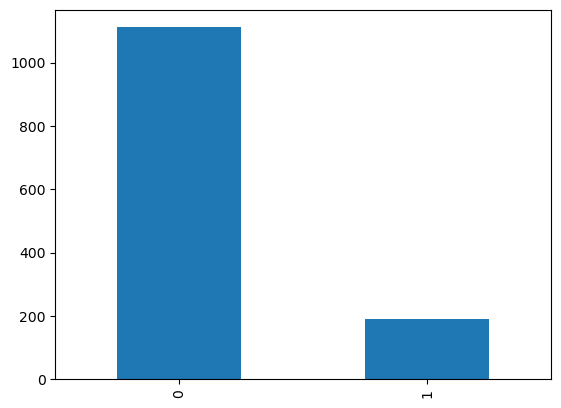

In [33]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

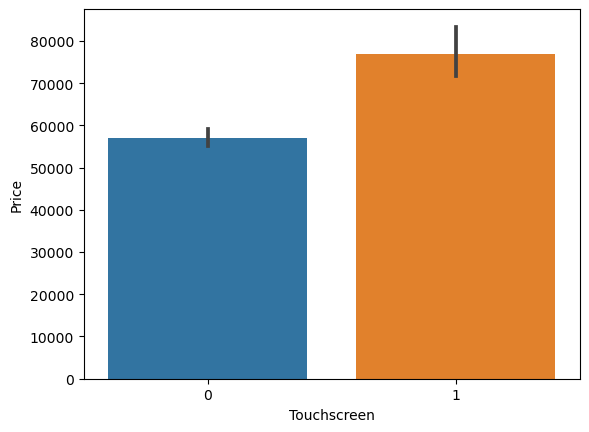

In [34]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [35]:
# creating a new column by the name 'Ips'
df['IPS']= df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<Axes: >

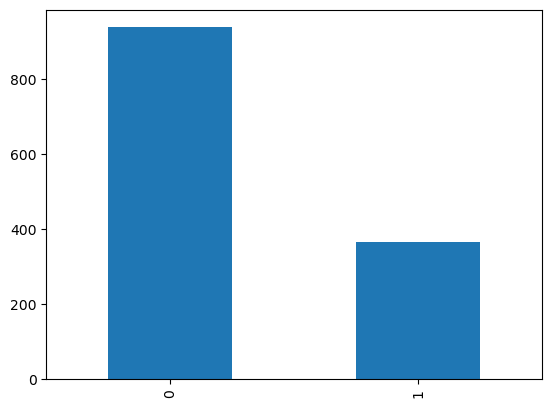

In [36]:
df['IPS'].value_counts().plot(kind='bar')
# conclusion: no of IPS displays are less compared to non-IPS

<Axes: xlabel='IPS', ylabel='Price'>

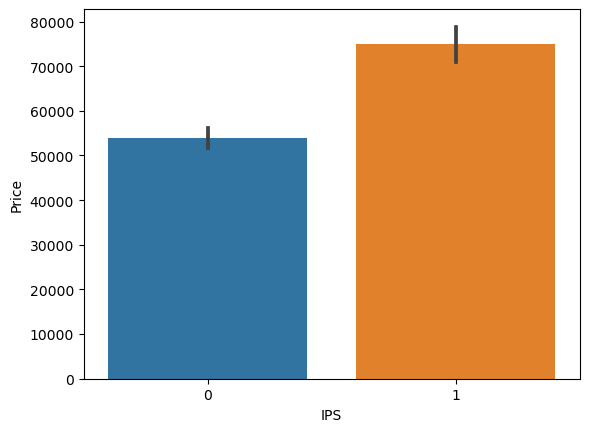

In [37]:

sns.barplot(x=df['IPS'],y=df['Price'])
# conclusion: price of IPS displays laptops are higher than non-IPS displays

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1


In [39]:
# creating 2 more columns 'x_resolution' and 'y_resolution' from ScreenResolution (eg: 2560x1600)

temp=df['ScreenResolution'].str.split()[0:]

df['x_resolution']=temp.apply(lambda x: int(x[-1].split('x')[0]))
df['y_resolution']=temp.apply(lambda x: int(x[-1].split('x')[1]))

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560,1600


In [41]:
df.corr()['Price']

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches          0.068196
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252207
x_resolution    0.556529
y_resolution    0.552809
Name: Price, dtype: float64

In [42]:
# Creating a new by the name PPI (ppi= (x_res^2 + y_res^2)^0.5 / Inches )

df['PPI']=(((df['x_resolution']**2 + df['y_resolution']**2)**0.5)/df['Inches']).astype('float32')

In [43]:
df.corr()['Price']

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches          0.068196
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252207
x_resolution    0.556529
y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [44]:
df.drop(columns=['ScreenResolution','Inches','x_resolution','y_resolution'],inplace=True)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002


In [46]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [47]:
df['cpu_name']=df['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

In [48]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name
50,Lenovo,2 in 1 Convertible,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,16996,1,1,224.173813,Intel Atom x5-Z8550
290,Acer,Notebook,Intel Celeron Dual Core 3205U 1.5GHz,2,16GB SSD,Intel HD Graphics,Chrome OS,2.19,10602,0,0,100.454666,Intel Celeron Dual
450,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.91,31381,0,0,100.454666,Intel Core i5
674,HP,2 in 1 Convertible,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,37242,1,1,157.350510,Intel Core i3
57,Asus,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,31232,0,0,100.454666,Intel Core i5


In [49]:
# creating new column for storing the modified brand names
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if 'Intel' in text:
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        

In [50]:
df['cpu_brand']= df['cpu_name'].apply(fetch_processor)

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5,Intel Core i5


<Axes: >

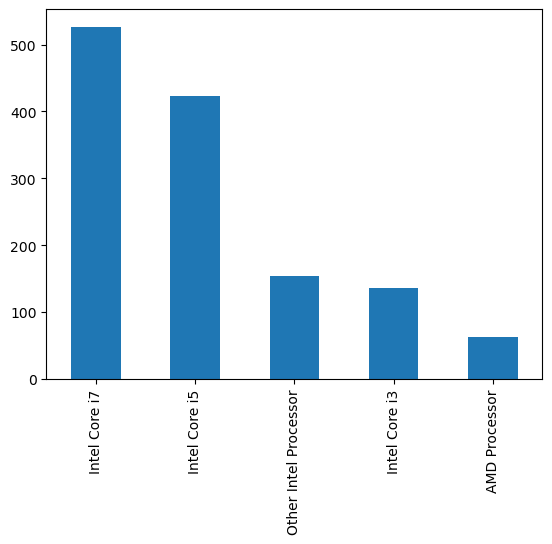

In [52]:
df['cpu_brand'].value_counts().plot(kind='bar')

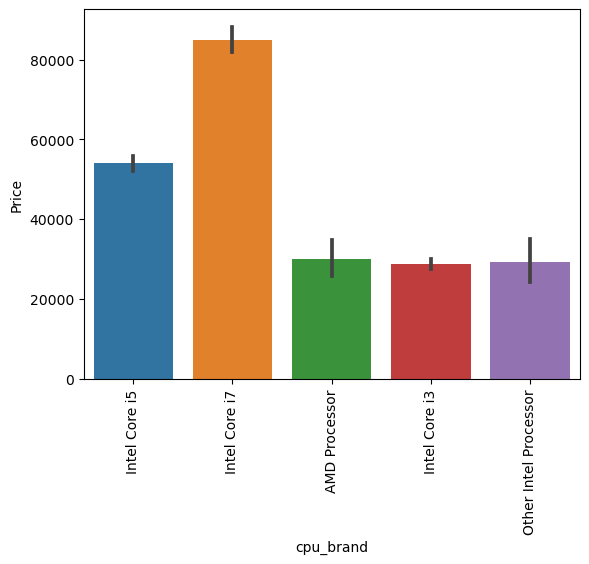

In [53]:
# relation between processor and price

sns.barplot(x=df['cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5,Intel Core i5


In [55]:
df=df.drop(columns=['Cpu','cpu_name'])

In [56]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5


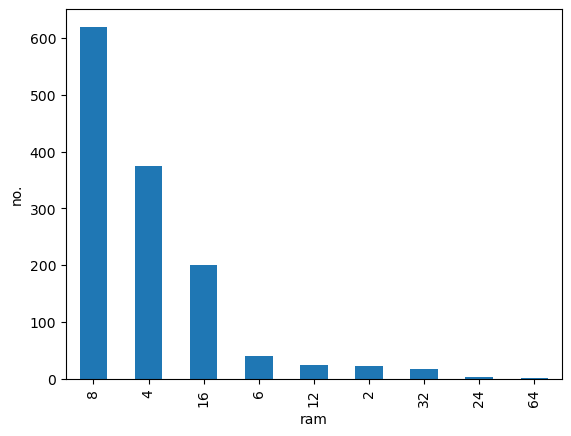

In [57]:
df['Ram'].value_counts().plot(kind='bar')
plt.xlabel('ram')
plt.ylabel('no.')
plt.show()

# conclusion: Devices with higher ram is less popular 

<Axes: xlabel='Ram', ylabel='Price'>

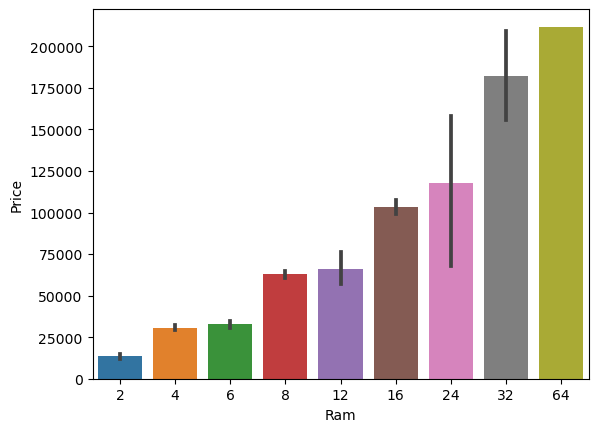

In [58]:
sns.barplot(x=df['Ram'],y=df['Price'])
# conclusion: As Ram increases the Prices also increases

In [59]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand
353,HP,Workstation,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.60,92615,0,0,141.212006,Intel Core i7
1001,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349,0,1,165.632111,Intel Core i5
1186,Dell,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 620,Windows 10,2.09,62817,1,0,141.212006,Intel Core i7
619,Acer,2 in 1 Convertible,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20193,1,1,135.094208,Other Intel Processor
125,HP,Notebook,4,500GB HDD,Intel HD Graphics 400,No OS,1.86,13799,0,0,100.454666,Other Intel Processor


In [60]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [61]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [62]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand,first
408,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.20,21791,0,0,141.212006,Intel Core i3,500 HDD
893,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.32,95850,0,1,157.350510,Intel Core i5,256 SSD
1200,Dell,Notebook,4,128 SSD,AMD Radeon R7 M440,Windows 10,2.30,26586,0,0,100.454666,Intel Core i3,128 SSD
830,Razer,Gaming,32,512 SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986,1,0,254.671356,Intel Core i7,512 SSD
188,Acer,Ultrabook,8,256 SSD,Intel HD Graphics 615,Windows 10,1.12,52693,0,1,165.632111,Intel Core i5,256 SSD


In [63]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\1539210121.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\1539210121.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [64]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5,0,256,0,0


In [65]:
df.drop(columns=['Memory'])

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992,1,1,157.350510,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866,1,1,276.053528,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705,0,0,100.454666,Intel Core i7,1000,0,0,0


In [66]:
df['Gpu_brand']= df['Gpu'].apply(lambda x: x.split()[0])

In [67]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5,0,256,0,0,Intel


In [68]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [69]:
df=df[df['Gpu_brand']!='ARM']

In [70]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

<Axes: xlabel='Gpu_brand', ylabel='Price'>

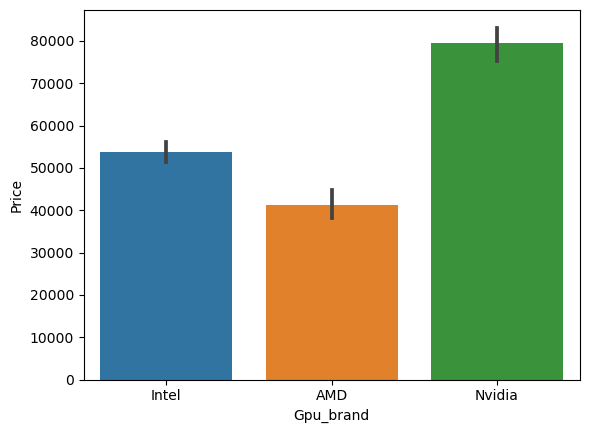

In [71]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])

In [72]:
df.drop(columns=['Gpu'],inplace= True)

In [73]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378,0,1,226.983002,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,256 SSD,No OS,1.86,30636,0,0,141.212006,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195,0,1,220.534622,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095,0,1,226.983002,Intel Core i5,0,256,0,0,Intel


In [74]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

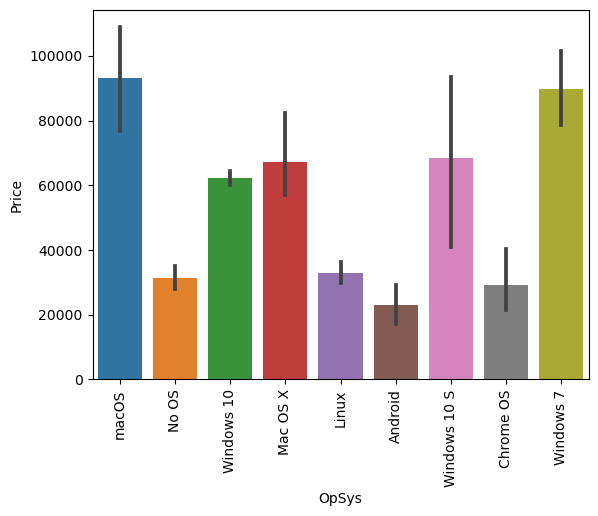

In [75]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [76]:
def os_type(x):
    if 'windows' in x.lower():
        return 'Windows'
    elif 'mac' in x.lower():
        return 'Mac'
    else:
        return 'Others/No Os/Linux'

In [77]:
df['os']= df['OpSys'].apply(os_type)

In [78]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378,0,1,226.983002,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,256 SSD,No OS,1.86,30636,0,0,141.212006,Intel Core i5,0,256,0,0,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195,0,1,220.534622,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095,0,1,226.983002,Intel Core i5,0,256,0,0,Intel,Mac


In [79]:
df.drop(columns=['OpSys'],inplace=True)

<Axes: xlabel='os', ylabel='Price'>

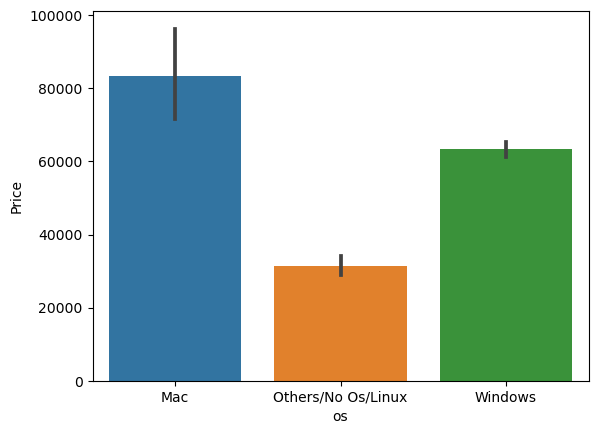

In [80]:
sns.barplot(x=df['os'],y=df['Price'])

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

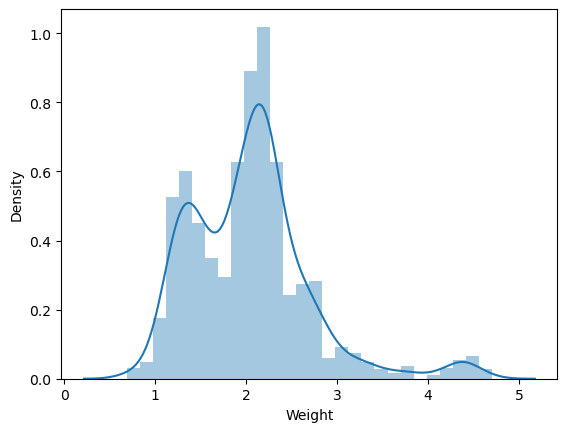

In [81]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

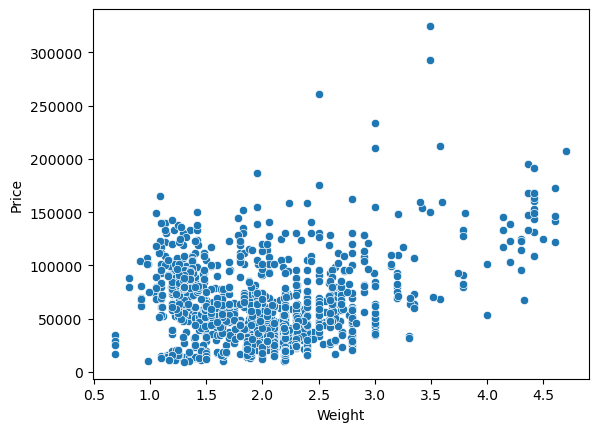

In [82]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [83]:
df.corr()['Price']

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253319
PPI              0.475368
HDD             -0.096892
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

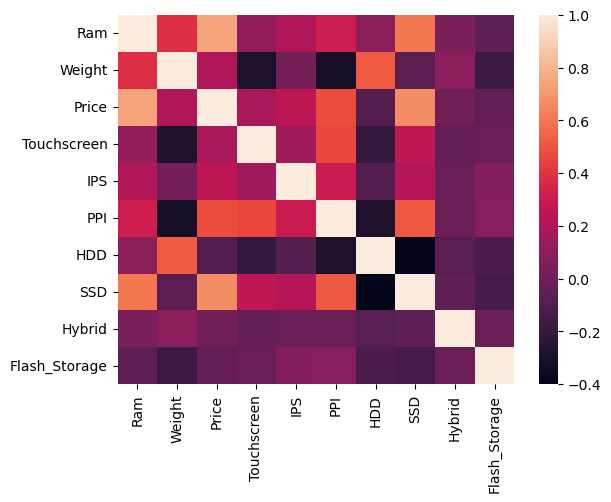

In [84]:
sns.heatmap(df.corr())

In [85]:
df.drop(columns=['Memory'])
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,Touchscreen,IPS,PPI,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand,os
0,Apple,Ultrabook,8,128 SSD,1.37,71378,0,1,226.983002,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,256 SSD,1.86,30636,0,0,141.212006,Intel Core i5,0,256,0,0,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,512 SSD,1.83,135195,0,1,220.534622,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,256 SSD,1.37,96095,0,1,226.983002,Intel Core i5,0,256,0,0,Intel,Mac


C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

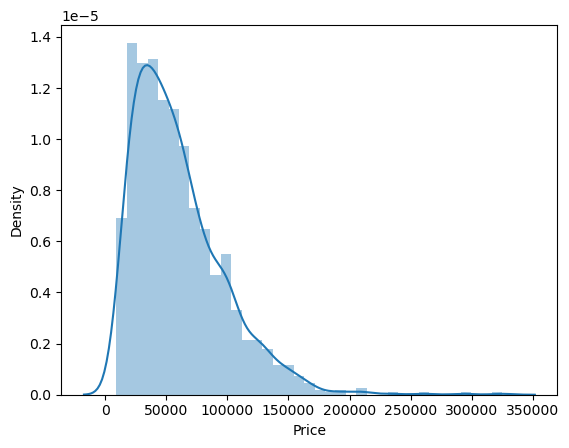

In [86]:
sns.distplot(df['Price'])

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_18468\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

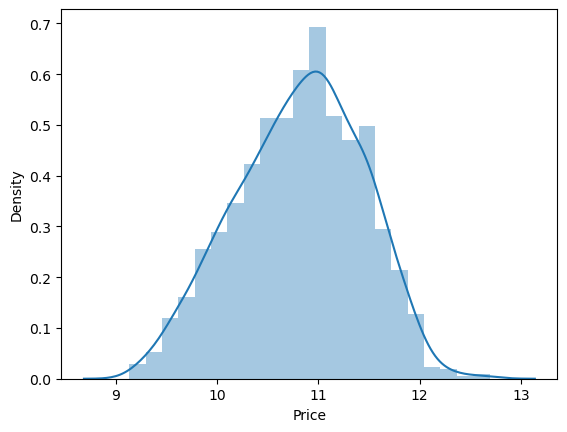

In [87]:
sns.distplot(np.log(df['Price']))

In [88]:
df=df.drop(columns=['Hybrid','Flash_Storage','Memory'])


In [89]:
X= df.drop(columns=['Price'])
y= np.log(df['Price'])

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.15,random_state=13)

In [91]:
# OneHotEncoding on all the categorical data

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [93]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [94]:
from sklearn.metrics import r2_score,mean_absolute_error

### Linear Regression

In [95]:
# steps for pipeline

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= LinearRegression()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.819825343196783
MAE 0.19413910280933577


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Ridge Regression

In [96]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
], remainder='passthrough')

step2=Ridge(alpha=10)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred= pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('mean_absolute_error', mean_absolute_error(y_test,y_pred))

R2 score 0.8059497279433397
mean_absolute_error 0.20341350649585013


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Lasso Regression

In [97]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= Lasso(alpha=0.001)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2 score 0.8067534317434604
mean_absolute_error 0.20173672350535624


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### KNN

In [98]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= KNeighborsRegressor(n_neighbors=3)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2 score 0.8546074751118422
mean_absolute_error 0.18056505130176986


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### DecisionTree

In [99]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= DecisionTreeRegressor(max_depth=9)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2 score 0.8621452913518749
mean_absolute_error 0.17282568832507222


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### SVM

In [100]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2 score 0.8349225437478627
mean_absolute_error 0.18303611609928708


### Random Forest


In [101]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15
                            )

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2 score 0.8932618260459703
mean_absolute_error 0.15085404497385377


### AdaBoost

In [102]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2 score 0.7980215723432197
mean_absolute_error 0.2213928092869686


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Gradient Boost

In [110]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= GradientBoostingRegressor(n_estimators=580)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2 score 0.9112081666376768
mean_absolute_error 0.13813823737998185


### XGBoosting

In [104]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= XGBRegressor(n_estimators=50,max_depth=5,learning_rate=0.55)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2 score 0.9176835993853457
mean_absolute_error 0.13415447968648922


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### ensemble technique

In [105]:
# Voting Regressor

from sklearn.ensemble import VotingRegressor,StackingRegressor

In [106]:
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

lr=LinearRegression()
gbdt= GradientBoostingRegressor(n_estimators=100,max_features=0.5)
rf= RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
xgb= XGBRegressor(n_estimators=50,learning_rate=0.55,max_depth=5)

step2= VotingRegressor([('rf',rf),('gbdt',gbdt),('lr',lr),('xgb',xgb)])

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2 score 0.9011434407601393
mean_absolute_error 0.14227689929275272


### exporting the model and the data

In [107]:
# XGB
step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= XGBRegressor(n_estimators=50,max_depth=5,learning_rate=0.55)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train),
y_pred=pipe.predict(X_test)

print('r2 score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2 score 0.9176835993853457
mean_absolute_error 0.13415447968648922


C:\Users\Prosenjit Mondal\anaconda3\envs\env01\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [112]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [114]:
import math

In [115]:
math.floor(2.11)

2